In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
upload1 = files.upload()
train = pd.read_csv("train.csv")
# upload2 = files.upload()
test = pd.read_csv("test.csv")

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.drop(["Name","Ticket","Cabin"], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [25]:
test.drop(["Name","Ticket","Cabin"], axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


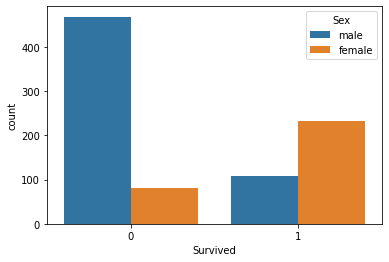

In [7]:
sns.countplot(x="Survived", data=train, hue="Sex")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


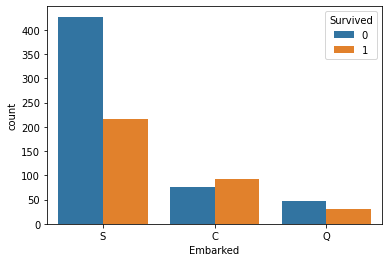

In [8]:
sns.countplot("Embarked", data=train, hue="Survived")

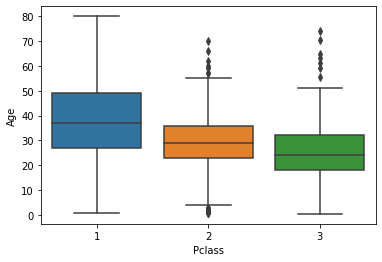

In [9]:
sns.boxplot(x="Pclass", y="Age", data=train)
# as you see, class1 ave age is 30, class2 is 30, class3 is 25 approximately 

In [10]:
# fill the nan values in age
train.loc[(train["Age"].isnull())& (train["Pclass"]==1), "Age"] = 37
train.loc[(train["Age"].isnull())& (train["Pclass"]==2), "Age"] = 29
train.loc[(train["Age"].isnull())& (train["Pclass"]==3), "Age"] = 24 # these are median values, i couldnt able to assign them directly

In [11]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
train.dropna(inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [14]:
gender = pd.get_dummies(train["Sex"])
pclass = pd.get_dummies(train["Pclass"], prefix="pclass")
embark = pd.get_dummies(train["Embarked"])
train = pd.concat([train, gender, pclass, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,pclass_1,pclass_2,pclass_3,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,1,0,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,1,0,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1,0,0,0,1,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,1,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,1,0,0,1


In [15]:
# multicollinearity, if male is 1, then its pretty obvious that female is 0 so keep only one from gender class, similar to pclass class
train_data = train.drop(["Pclass","Sex","Embarked","Q","pclass_3","female"], axis=1)
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,pclass_1,pclass_2,C,S
0,1,0,22.0,1,0,7.2500,1,0,0,0,1
1,2,1,38.0,1,0,71.2833,0,1,0,1,0
2,3,1,26.0,0,0,7.9250,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,1,0,0,1
4,5,0,35.0,0,0,8.0500,1,0,0,0,1


In [16]:
x = train_data.drop("Survived", axis=1)
y = train_data.iloc[:,1]

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
for i in [x_train, x_test, y_train, y_test]:
  print(i.shape)

(711, 10)
(178, 10)
(711,)
(178,)


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logr = LogisticRegression()
logr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [20]:
# train accuracy
from sklearn.metrics import accuracy_score
y_pred_train = logr.predict(x_train)
print(accuracy_score(y_train, y_pred_train)) 

0.790436005625879


In [21]:
y_pred_test = logr.predict(x_test)
print(accuracy_score(y_test, y_pred_test))

0.848314606741573


In [22]:
#lets try with randomforest
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier()
rand.fit(x_train, y_train)

RandomForestClassifier()

In [23]:
rf_pred_train = rand.predict(x_train)
print(accuracy_score(y_train, rf_pred_train))

1.0


In [24]:
rf_pred_test = rand.predict(x_test)
print(accuracy_score(y_test, rf_pred_test))

0.8314606741573034


In [26]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [32]:
print(test.loc[test["Pclass"]==1, "Age"].median())
print(test.loc[test["Pclass"]==2, "Age"].median())
print(test.loc[test["Pclass"]==3, "Age"].median())

42.0
26.5
24.0


In [33]:
# fill the nan values in age
test.loc[(test["Age"].isnull())& (test["Pclass"]==1), "Age"] = 42
test.loc[(test["Age"].isnull())& (test["Pclass"]==2), "Age"] = 26.5
test.loc[(test["Age"].isnull())& (test["Pclass"]==3), "Age"] = 24

In [37]:
test.loc[test["Fare"].isnull(),"Fare"] = test.Fare.median()

In [39]:
gender2 = pd.get_dummies(test["Sex"])
pclass2 = pd.get_dummies(test["Pclass"], prefix="pclass")
embark2 = pd.get_dummies(test["Embarked"])
test = pd.concat([test, gender2,pclass2, embark2], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,pclass_1,pclass_2,pclass_3,C,Q,S
0,892,3,male,34.5,0,0,7.8292,Q,0,1,0,0,1,0,1,0
1,893,3,female,47.0,1,0,7.0000,S,1,0,0,0,1,0,0,1
2,894,2,male,62.0,0,0,9.6875,Q,0,1,0,1,0,0,1,0
3,895,3,male,27.0,0,0,8.6625,S,0,1,0,0,1,0,0,1
4,896,3,female,22.0,1,1,12.2875,S,1,0,0,0,1,0,0,1


In [40]:
#multicollinearity
test_data = test.drop(["Pclass","Sex","Embarked","Q","pclass_3","female"], axis=1)
test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,male,pclass_1,pclass_2,C,S
0,892,34.5,0,0,7.8292,1,0,0,0,0
1,893,47.0,1,0,7.0000,0,0,0,0,1
2,894,62.0,0,0,9.6875,1,0,1,0,0
3,895,27.0,0,0,8.6625,1,0,0,0,1
4,896,22.0,1,1,12.2875,0,0,0,0,1


In [41]:
prediction = rand.predict(test_data)
prediction

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [57]:
sub = pd.DataFrame({"PassengerId": test_data["PassengerId"], "Survived": prediction})
sub.to_csv("Submission.csv", index=False)

In [59]:
files.download("Submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>